# Attempting problem 3 using Minkowski sum for collision detection

In [2]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import itertools as it

# scikit-geometry version 0.1 (https://github.com/scikit-geometry/scikit-geometry)
import skgeom as sg
from skgeom import minkowski, boolean_set

# Custom modules
from lib import myhelpers as hlp
from lib.envmap import Map, Rect

From lecture: "If Pis an obstacle in the workspace and Mis a moving object. Then the C-space obstacle corresponding to P is P(-)M" where (-) represents Minkowski difference.

In [6]:
# Start and end locations
start = np.array([50,50])
end   = np.array([750,50])

# Robot
robot_pts = np.array(
      [ [ 0, 0],
        [ 0,50],
        [50,50],
        [50,  0] ]
)[::-1] # I defined them in CW order instead of CCW order, so reverse
robot_pts = robot_pts + np.array(start) # translate to starting position
robot_pts = -robot_pts # reflect to turn minkowski sum into difference

robot = sg.Polygon([sg.Point2(*p) for p in robot_pts])

# Given resolution of 2 pixels, each obstacle line will have a width of 2
obstacles = [
    # Outer borders - start and endpoints
    [(0,0),(800,0)],
    [(0,0),(0,300)],
    [(800,0),(800,300)],
    [(0,300),(800,300)],
    # Inner borders
    [(200,0),(200,200)],
    [(100,200),(300,200)],
    [(400,300),(400,100)],
    [(600,0),(600,200)],
    [(500,200),(700,200)]
]

obstacles = np.array(obstacles)


### Calculate Minkowski sum of reflection of robot (-R) and each line segment obstacle.

Line segment obstacles are inflated to a width of 2 centered on its location. Width of 2 is chosen because it is the resolution.

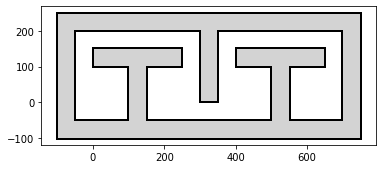

In [8]:


# Do it once to start then iterate
obs = obstacles[0]
# Calculate the normal
n = [obs[1,1]-obs[0,1],obs[1,0]-obs[0,0]]
n /= np.linalg.norm(n)
# Create polygon centered on line segment with thickness 2 (expand 1 in normal directions)
P = sg.Polygon(np.concatenate([obs-n,obs[::-1]+n]))
# Ensure proper orientation (CCW)
if P.area() < 0:
     P = sg.Polygon(np.concatenate([obs[::-1]-n,obs+n]))
#Calculate Minkowski Sum (remember, robot was reflected, so this is the M. difference)
union = sg.minkowski.minkowski_sum(P,robot)

for i,obs in enumerate(obstacles[1:]):
    # Calculate the normal
    n = [obs[1,1]-obs[0,1],obs[1,0]-obs[0,0]]
    n /= np.linalg.norm(n)
    # Create polygon centered on line segment with thickness 2 (expand 1 in normal directions)
    P = sg.Polygon(np.concatenate([obs-n,obs[::-1]+n]))
    # Ensure proper orientation (CCW)
    if P.area() < 0:
         P = sg.Polygon(np.concatenate([obs[::-1]-n,obs+n]))
    #Calculate Minkowski Sum (remember, robot was reflected, so this is the M. difference)
    ms = sg.minkowski.minkowski_sum(P,robot)
    
    # Union of all obstacles
    union = boolean_set.join(union,ms)

# Note: I don't know how to flip the axes, so right now the y-axis is in the wrong
# direction, and the axes are right-handed, not left-handed.
sg.draw.draw(union)


### Refs (for intuition)
\
\
http://twistedoakstudios.com/blog/Post554_minkowski-sums-and-differences
https://www.slideshare.net/crowdscontrol/minkowski-sum-on-2d-geometry